In [49]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import numpy as np
import pandas as pd
import hvplot.pandas
import os
import json
import requests
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import sqlalchemy as sql

In [50]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [51]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [52]:
# Format current date as ISO format
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-05", tz="America/New_York").isoformat()

In [53]:
#Client Portfolio 
# Set the tickers
tickers = ["GOOG","CMG","IBM", "XLB"]

 

In [54]:
#Diversifying portfolio
tickers_2= ["GOOG","CMG","IBM", "XLB","SPY","AGG"]

In [55]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
data_set= (tickers, timeframe, start_date, end_date)
data_set= (tickers_2, timeframe, start_date, end_date)

In [56]:
# Set the number of years of data to fetch
num_years = 20

lim = 1000
num_days_data_needed = num_years * 252
def format_date_iso(date):
    return pd.Timestamp(date, tz="America/New_York").isoformat()

        
# Get current closing prices of portfolio
client_prices_df = pd.DataFrame()
prices_df = pd.DataFrame()
client_prices_df = alpaca.get_barset(tickers,timeframe,start = start_date,end = end_date,limit=lim).df
prices_df = alpaca.get_barset(tickers_2,timeframe,start = start_date,end = end_date,limit=lim).df

#get the portfolio closing price
#portfolio_closing_prices_df["AGG"] = portfolio_df["AGG"]["close"]
#concanating portfolio closing price
#closing_price_client_df = pd.concat([cmg_price, goog_price,ibm_price, xlb_price],axis=1)
#closing_price_portfolio_df = pd.concat([cmg_price, goog_price,ibm_price, xlb_price,agg_price,spy_price], axis =1)
#creating portfolio daily returns dataframe
client_portfolio_dialy_returns=pd.DataFrame()
portfolio_daily_returns=pd.DataFrame()
# Create an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()
#get portfolio daily returns
#client_portfolio_daily_returns=closing_prices_df.pct_change().dropna()                                        
#portfolio_daily_returns=closing_prices_df.pct_change().dropna()
#creating Portfolio cumulative returns dataframe\
client_portfolio_cumulative_returns=pd.DataFrame()                                       
portfolio_cumulative_returns=pd.DataFrame()
#Analyzing portfolio cumulative returns
client_portfolio_cumulative_returns=(1 + portfolio_daily_returns).cumprod()-1                                        
portfolio_cumulative_returns=(1 + portfolio_daily_returns).cumprod()-1

# Display sample data
client_prices_df.sort_index(inplace=True)
display(client_prices_df.head())
display(prices_df.head())

CMG                                      \
                             open      high     low   close    volume   
time                                                                    
2019-05-01 00:00:00-04:00  688.86  697.3300  685.40  688.41  377159.0   
2019-05-02 00:00:00-04:00  687.40  708.8585  686.15  707.93  585736.0   
2019-05-03 00:00:00-04:00  707.57  710.9321  703.42  709.21  408668.0   
2019-05-06 00:00:00-04:00  703.23  720.0000  702.90  716.68  448007.0   
2019-05-07 00:00:00-04:00  716.63  721.4200  702.10  706.37  396476.0   

                              GOOG                                          \
                              open       high        low    close   volume   
time                                                                         
2019-05-01 00:00:00-04:00  1188.05  1188.0500  1167.1800  1167.92  2458890   
2019-05-02 00:00:00-04:00  1167.76  1174.1895  1155.0018  1162.48  1795505   
2019-05-03 00:00:00-04:00  1173.65  1186.8000  1169.0000  1185.56  1768455   
2019-05-06 00:00:00-04:00  1166.26  1190.8500  1166.2600  1189.51  1428613   
2019-05-07 00:00:00-04:00  1180.47  1190.4400  1161.0400  1174.62  1346224   

                              IBM                                     XLB  \
                             open    high     low   close   volume   open   
time                                                                        
2019-05-01 00:00:00-04:00  140.55  141.81  140.17  140.57  2599918  57.53   
2019-05-02 00:00:00-04:00  140.50  141.28  139.41  139.64  2729143  56.14   
2019-05-03 00:00:00-04:00  139.70  141.00  139.63  140.28  1967352  56.23   
2019-05-06 00:00:00-04:00  138.30  140.69  137.90  140.40  2198347  55.32   
2019-05-07 00:00:00-04:00  139.15  139.51  136.19  137.62  4056178  55.33   

                                                           
                            high     low  close    volume  
time                                                       
2019-05-01 00:00:00-04:00  57.53  56.400  56.41   6452315  
2019-05-02 00:00:00-04:00  56.44  55.725  56.11  10500422  
2019-05-03 00:00:00-04:00  56.70  56.180  56.67   5918612  
2019-05-06 00:00:00-04:00  56.08  55.320  55.88  15531266  
2019-05-07 00:00:00-04:00  55.43  54.590  54.89   7603725

AGG                                        CMG  \
                             open    high      low    close   volume    open   
time                                                                           
2019-05-01 00:00:00-04:00  108.47  108.76  108.320  108.390  4426906  688.86   
2019-05-02 00:00:00-04:00  108.33  108.33  108.100  108.165  2230918  687.40   
2019-05-03 00:00:00-04:00  108.32  108.42  108.275  108.350  2179061  707.57   
2019-05-06 00:00:00-04:00  108.56  108.57  108.440  108.460  4495020  703.23   
2019-05-07 00:00:00-04:00  108.63  108.70  108.585  108.620  2788574  716.63   

                                                               ...     SPY  \
                               high     low   close    volume  ...    open   
time                                                           ...           
2019-05-01 00:00:00-04:00  697.3300  685.40  688.41  377159.0  ...  294.72   
2019-05-02 00:00:00-04:00  708.8585  686.15  707.93  585736.0  ...  291.68   
2019-05-03 00:00:00-04:00  710.9321  703.42  709.21  408668.0  ...  292.82   
2019-05-06 00:00:00-04:00  720.0000  702.90  716.68  448007.0  ...  289.25   
2019-05-07 00:00:00-04:00  721.4200  702.10  706.37  396476.0  ...  290.15   

                                                                XLB         \
                             high     low   close     volume   open   high   
time                                                                         
2019-05-01 00:00:00-04:00  294.95  291.80  291.84   59432706  57.53  57.53   
2019-05-02 00:00:00-04:00  292.70  289.52  291.27   59209780  56.14  56.44   
2019-05-03 00:00:00-04:00  294.34  292.56  294.02   45416907  56.23  56.70   
2019-05-06 00:00:00-04:00  293.31  288.90  292.87   75426654  55.32  56.08   
2019-05-07 00:00:00-04:00  290.81  285.81  288.04  118960368  55.33  55.43   

                                                    
                              low  close    volume  
time                                                
2019-05-01 00:00:00-04:00  56.400  56.41   6452315  
2019-05-02 00:00:00-04:00  55.725  56.11  10500422  
2019-05-03 00:00:00-04:00  56.180  56.67   5918612  
2019-05-06 00:00:00-04:00  55.320  55.88  15531266  
2019-05-07 00:00:00-04:00  54.590  54.89   7603725  

[5 rows x 30 columns]

In [60]:
#creating an empty for holding the closing prices
client_closing_prices_df = pd.DataFrame()
#usinga for loop, for every tickers list,
#select the close price for each tickers in prices_df for the same ticker value
#That will be equal to closing_prices_df
for ticker in tickers:
    client_closing_prices_df[ticker]= client_prices_df[ticker]['close']
#For the new closing_prices_df DataFrame ,keep only data component
#creating an empty for holding the closing prices
closing_prices_df = pd.DataFrame()
#usinga for loop, for every tickers list,
#select the close price for each tickers in prices_df for the same ticker value
#That will be equal to closing_prices_df
for ticker in tickers_2:
    closing_prices_df[ticker]= prices_df[ticker]['close']
#For the new closing_prices_df DataFrame ,keep only data component
#closing_prices_df.set.index = closing_prices_df.index.date
#display the first 5 rows
display(client_closing_prices_df.head())

#closing_prices_df.set.index = closing_prices_df.index.date
#display the first 5 rows
display(closing_prices_df.head())

,GOOG,CMG,IBM,XLB
time,,,,
2019-05-01 00:00:00-04:00,1167.92,688.41,140.57,56.41
2019-05-02 00:00:00-04:00,1162.48,707.93,139.64,56.11
2019-05-03 00:00:00-04:00,1185.56,709.21,140.28,56.67
2019-05-06 00:00:00-04:00,1189.51,716.68,140.40,55.88
2019-05-07 00:00:00-04:00,1174.62,706.37,137.62,54.89


,GOOG,CMG,IBM,XLB,SPY,AGG
time,,,,,,
2019-05-01 00:00:00-04:00,1167.92,688.41,140.57,56.41,291.84,108.390
2019-05-02 00:00:00-04:00,1162.48,707.93,139.64,56.11,291.27,108.165
2019-05-03 00:00:00-04:00,1185.56,709.21,140.28,56.67,294.02,108.350
2019-05-06 00:00:00-04:00,1189.51,716.68,140.40,55.88,292.87,108.460
2019-05-07 00:00:00-04:00,1174.62,706.37,137.62,54.89,288.04,108.620


<AxesSubplot:title={'center':'Closing Prices of Client portfolio with diversifying stocks'}, xlabel='time'>

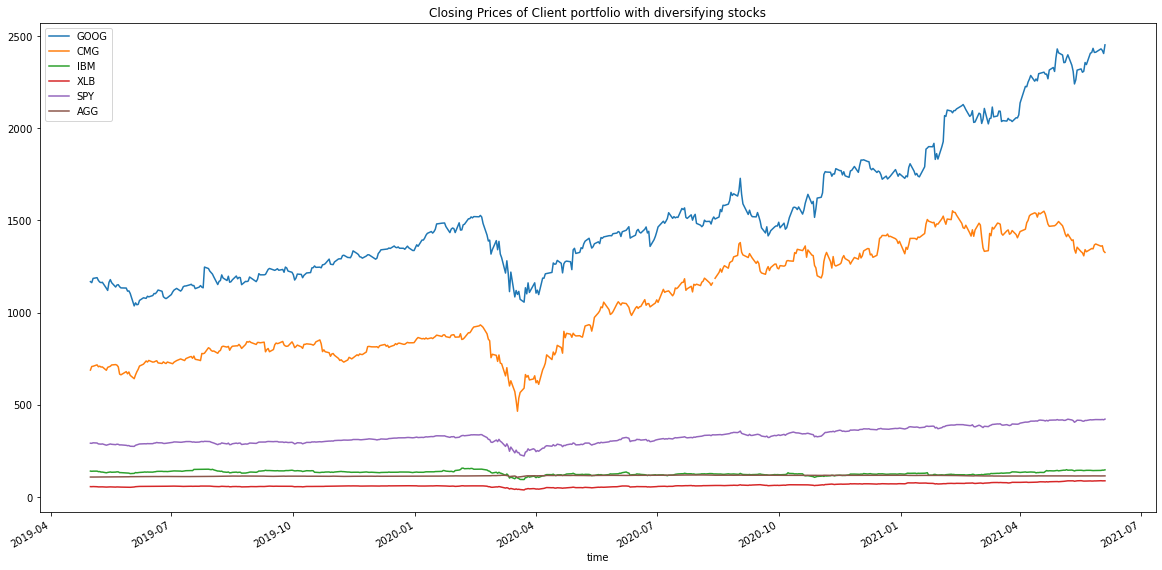

In [75]:
#visualizing the closing_prices_df using plot
closing_prices_df.plot(figsize=(20,10),title='Closing Prices of Client portfolio with diversifying stocks')

In [64]:
# Compute the `client_daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
client_daily_returns= client_closing_prices_df.pct_change().dropna()
client_daily_returns.head()

,GOOG,CMG,IBM,XLB
time,,,,
2019-05-02 00:00:00-04:00,-0.004658,0.028355,-0.006616,-0.005318
2019-05-03 00:00:00-04:00,0.019854,0.001808,0.004583,0.009980
2019-05-06 00:00:00-04:00,0.003332,0.010533,0.000855,-0.013940
2019-05-07 00:00:00-04:00,-0.012518,-0.014386,-0.019801,-0.017717
2019-05-08 00:00:00-04:00,-0.007560,0.004530,0.002761,-0.001093


<AxesSubplot:title={'center':'Client Portfolio Daily returns '}, xlabel='time'>

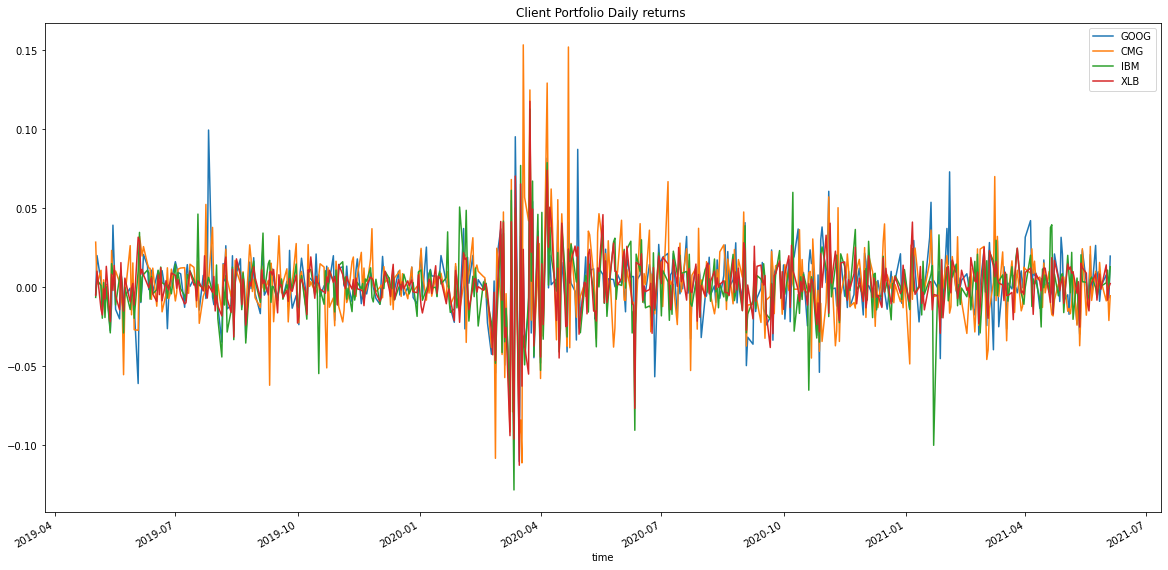

In [65]:
#using Client Portfolio Daily returns stocks plot
client_daily_returns.plot(figsize=(20,10), title= 'Client Portfolio Daily returns ')

In [34]:
# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
daily_returns = closing_prices_df.pct_change().dropna()
daily_returns.head()

,GOOG,CMG,IBM,XLB,SPY,AGG
time,,,,,,
2019-05-02 00:00:00-04:00,-0.004658,0.028355,-0.006616,-0.005318,-0.001953,-0.002076
2019-05-03 00:00:00-04:00,0.019854,0.001808,0.004583,0.009980,0.009441,0.001710
2019-05-06 00:00:00-04:00,0.003332,0.010533,0.000855,-0.013940,-0.003911,0.001015
2019-05-07 00:00:00-04:00,-0.012518,-0.014386,-0.019801,-0.017717,-0.016492,0.001475
2019-05-08 00:00:00-04:00,-0.007560,0.004530,0.002761,-0.001093,-0.001666,-0.000460


<AxesSubplot:title={'center':'Client Portfolio Daily returns with diversifying stocks'}, xlabel='time'>

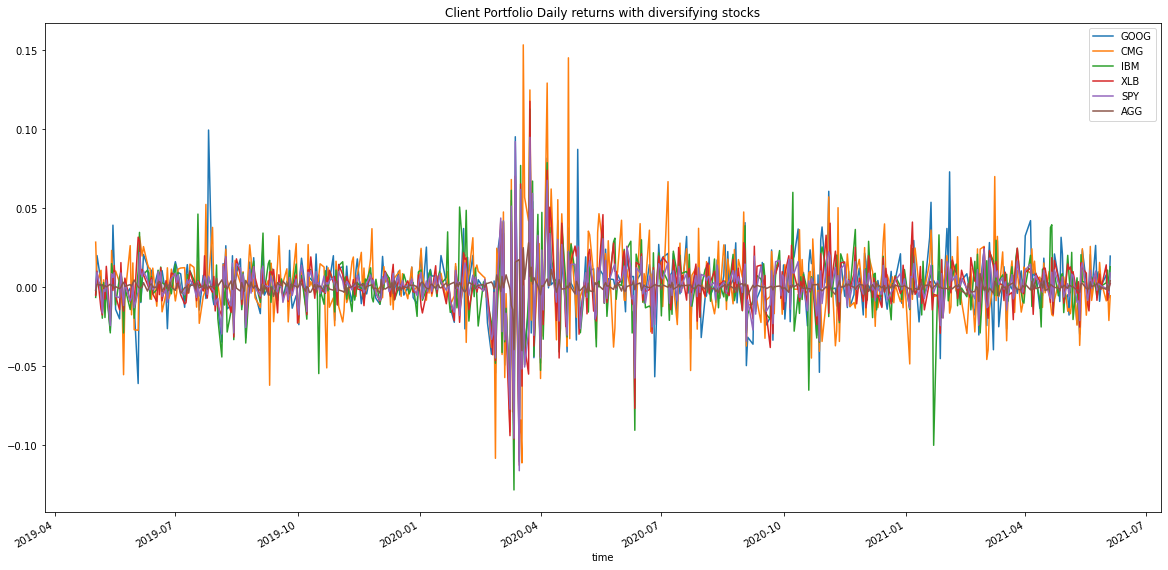

In [47]:
#using Client Portfolio Daily returns with diversifying stocks plot 
daily_returns.plot(figsize=(20,10), title= 'Client Portfolio Daily returns with diversifying stocks')

<AxesSubplot:title={'center':'Daily Retruns Histogram'}, ylabel='Frequency'>

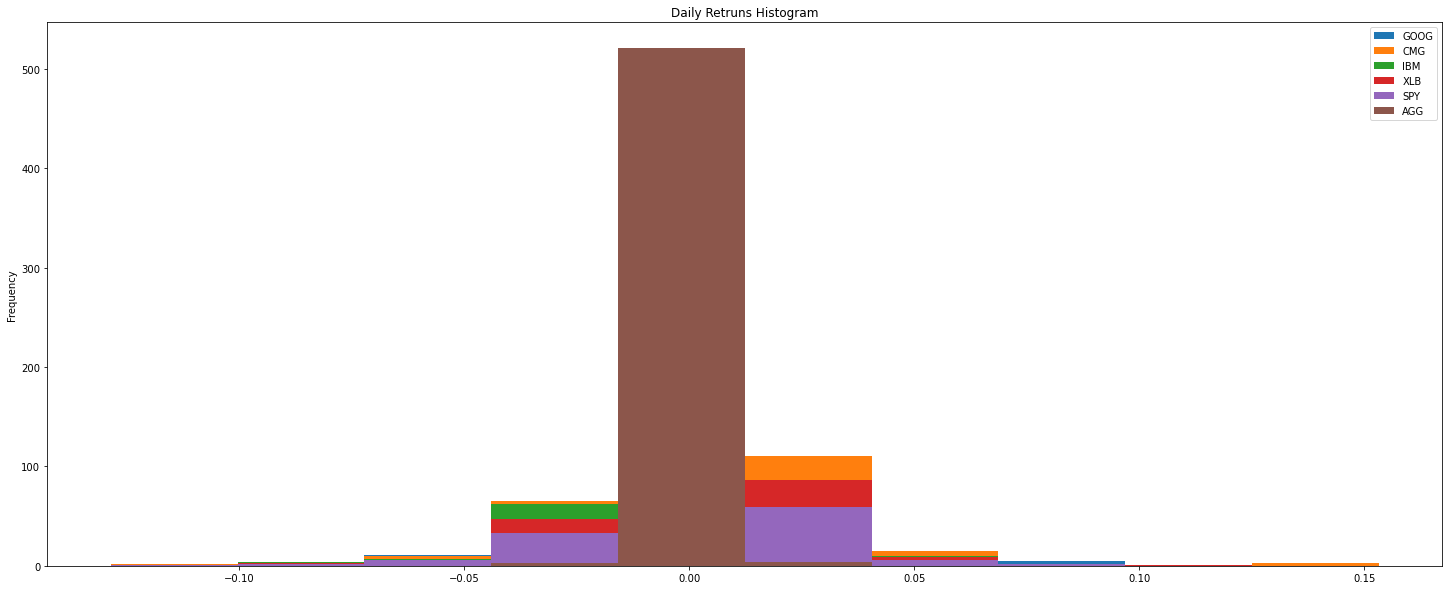

In [35]:
# Visualize distribution of daily returns percent change in closing price using a histogram plot
daily_returns.plot.hist(
    figsize=(25,10),
    title='Daily Retruns Histogram'
)

In [13]:
# Generate summary statistics for the `daily_returns_df` DataFrame
daily_returns_df.describe()

,GOOG,CMG,IBM,XLB,SPY,AGG
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,0.001612,0.001557,0.000303,0.001011,0.000831,0.000115
std,0.020318,0.025190,0.020565,0.018425,0.016075,0.004101
min,-0.110481,-0.111387,-0.128507,-0.112879,-0.116340,-0.040343
25%,-0.006645,-0.009723,-0.008300,-0.006585,-0.004418,-0.001107
50%,0.001807,0.001527,0.000838,0.001620,0.001521,0.000205
75%,0.011031,0.012137,0.009377,0.009544,0.007580,0.001443
max,0.099333,0.153257,0.112612,0.117540,0.094737,0.027948


<AxesSubplot:title={'center':'AGG Probability Distribution'}, ylabel='Frequency'>

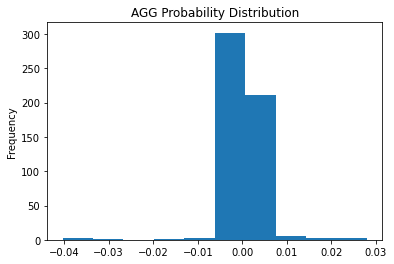

In [36]:
#Visualize distribution of iShares Core US Aggregate Bond ETF percent change in closing price using a histogram plot
daily_returns["AGG"].plot.hist(title='AGG Probability Distribution')

<AxesSubplot:title={'center':'SPY Probability Distribution'}, ylabel='Frequency'>

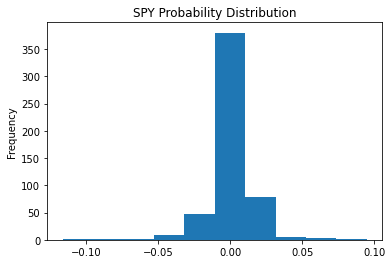

In [38]:
#Visualize distribution of SPDR S&P 500 ETF Trust percent change in closing price using a histogram plot
daily_returns["SPY"].plot.hist(title='SPY Probability Distribution')

<AxesSubplot:title={'center':'Density Plot for CMG, GOOG, IBM, XLB, AGG and SPY '}, ylabel='Density'>

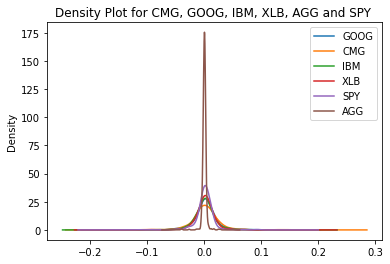

In [37]:
# Visualize the distribution of daily returns data for CMG, GOOG, IBM, XLB, AGG and SPY
# by calling the plot.density function on the daily_returns_df DataFrame.
daily_returns.plot.density(title='Density Plot for CMG, GOOG, IBM, XLB, AGG and SPY ')

In [77]:
#Using the default Pandas plot to visualize the cumulative return values for the client portfolio and diversifying stocks over time. 
#portfolio_cumulative_price = (1+portfolio_daily_returns).cumprod()-1
portfolio_cumulative_price = (1+daily_returns).cumprod()-1
portfolio_cumulative_price.head()

,GOOG,CMG,IBM,XLB,SPY,AGG
time,,,,,,
2019-05-02 00:00:00-04:00,-0.004658,0.028355,-0.006616,-0.005318,-0.001953,-0.002076
2019-05-03 00:00:00-04:00,0.015104,0.030215,-0.002063,0.004609,0.007470,-0.000369
2019-05-06 00:00:00-04:00,0.018486,0.041066,-0.001209,-0.009395,0.003529,0.000646
2019-05-07 00:00:00-04:00,0.005737,0.026089,-0.020986,-0.026946,-0.013021,0.002122
2019-05-08 00:00:00-04:00,-0.001867,0.030737,-0.018283,-0.028009,-0.014666,0.001661


In [79]:
#portfolio cumulative price using hvplot function
portfolio_cumulative_price.hvplot(
    figsize=(20,10),
    xlabel="Date",
    ylabel= "portfolio_cumulative_price",
    title= "Portfolio Cumulative Price"
)

:NdOverlay   [Variable]
   :Curve   [time]   (value)

### Analyze the Volatility

<AxesSubplot:title={'center':'Daily Returns client Portfolio and Diversifying stocks'}>

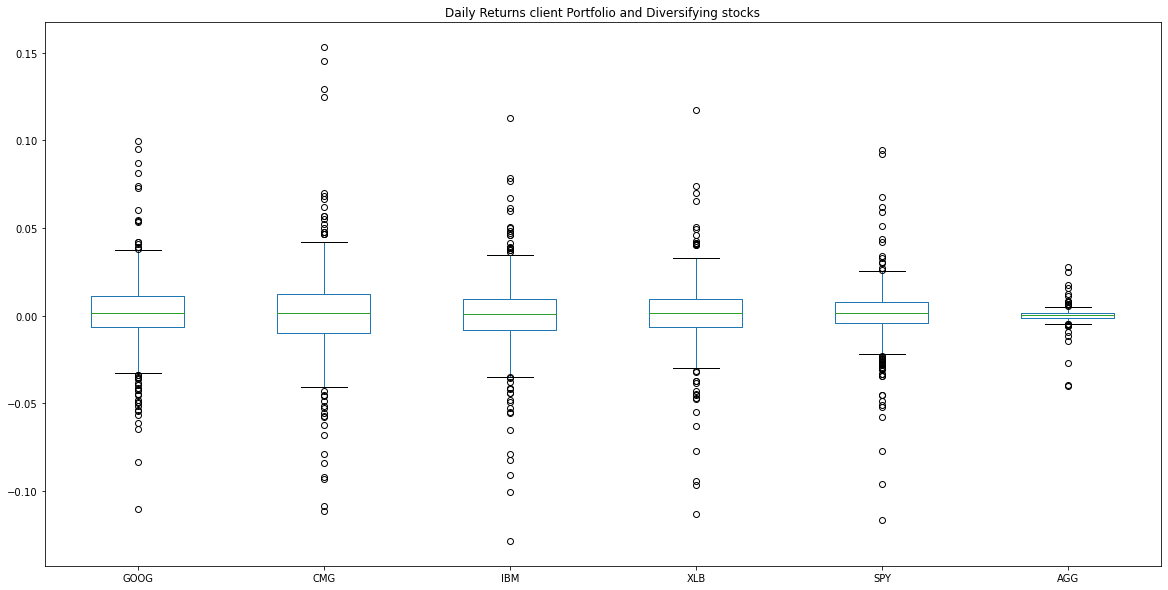

In [80]:
#Use the Pandas plot function and the kind="box" parameter to visualize the daily return data for each of the four portfolios 
daily_returns.plot(kind='box', figsize=(20,10), title= 'Daily Returns client Portfolio and Diversifying stocks')

<AxesSubplot:title={'center':'Cumulative Returns '}>

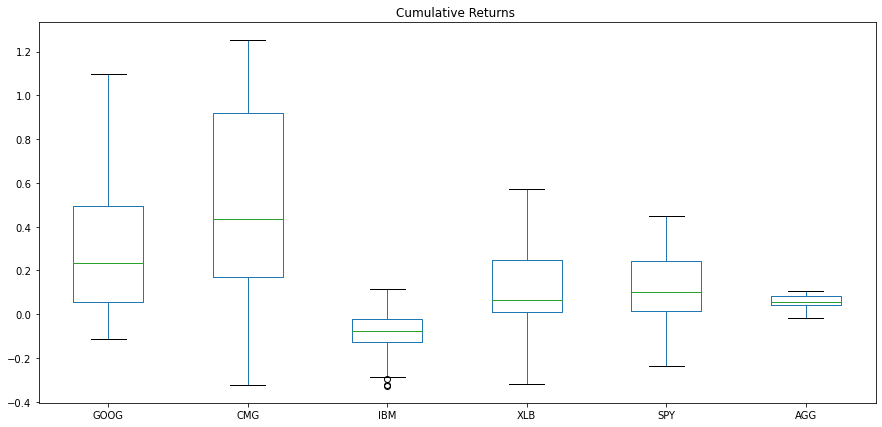

In [81]:
#Visualize the cumulative returns data for just the four fund portfolios by using another box plot.
portfolio_cumulative_price.plot(kind='box', figsize=(15,7), title= 'Cumulative Returns ')

In [83]:
#Use the Pandas std function to calculate the standard deviation for each of the portfolios
standard_deviation = daily_returns.std()
standard_deviation

GOOG    0.020318
CMG     0.025190
IBM     0.020565
XLB     0.018425
SPY     0.016075
AGG     0.004101
dtype: float64

In [85]:
annualized_standard_deviation= daily_returns.std()*np.sqrt(252)
annualized_standard_deviation

GOOG    0.322535
CMG     0.399885
IBM     0.326461
XLB     0.292483
SPY     0.255178
AGG     0.065100
dtype: float64

In [89]:
trading_days = 252
annual_average_return = daily_returns.mean()*trading_days
annual_average_return

GOOG    0.406114
CMG     0.392344
IBM     0.076370
XLB     0.254829
SPY     0.209499
AGG     0.028994
dtype: float64

In [91]:
sharpe_ratios = annual_average_return/annualized_standard_deviation
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

IBM     0.233934
AGG     0.445373
SPY     0.820993
XLB     0.871262
CMG     0.981142
GOOG    1.259133
dtype: float64

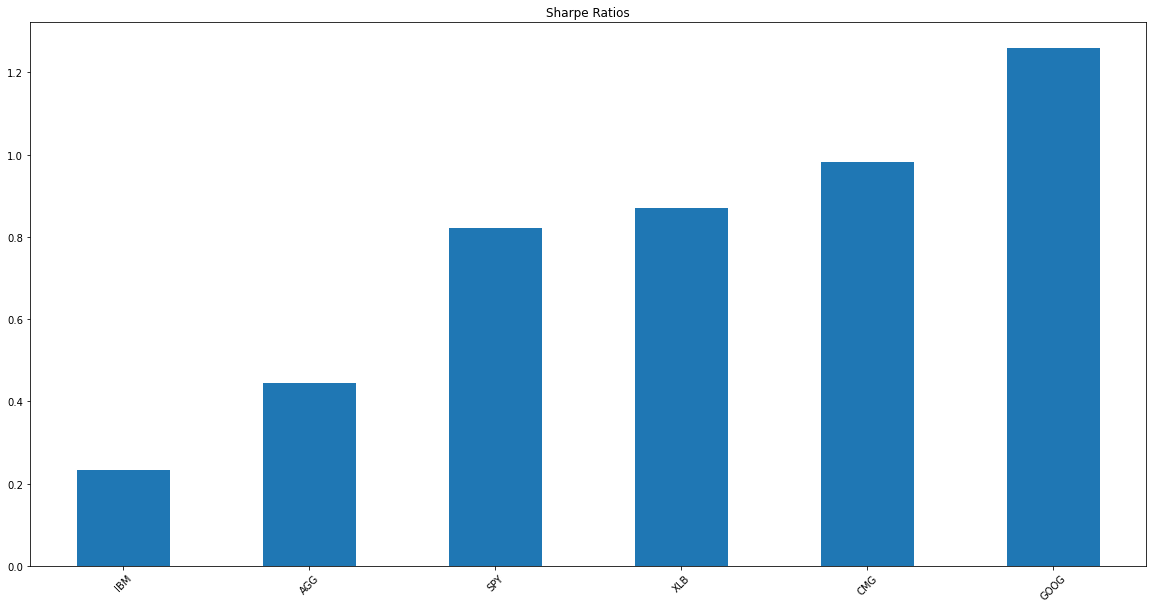

In [93]:
sharpe_ratios.plot.bar(title='Sharpe Ratios', figsize= (20,10),rot=45)
plt.show()

In [17]:
portfolio_weights= pd.DataFrame(
    {
        "ticker": ["CMG", "GOOG", "IBM", "XLB","AGG","SPY"],
        "weights": (0.28, .44, 0, 0,0.25, 0.03),
    }
)
portfolio_weights

,ticker,weights
0,CMG,0.28
1,GOOG,0.44
2,IBM,0.00
3,XLB,0.00
4,AGG,0.25
5,SPY,0.03


<AxesSubplot:title={'center':'Tickers pie chart'}, ylabel='weights'>

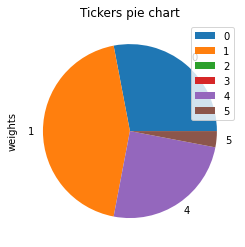

In [18]:
portfolio_weights.plot.pie(y= "weights", title= "Tickers pie chart")

In [19]:
client_portfolio_quantities=pd.DataFrame({
    "ticker": ["CMG", "GOOG", "IBM", "XLB"],
    'quantity':[10,20,500,1000]})
display(client_portfolio_quantities)


,ticker,quantity
0,CMG,10
1,GOOG,20
2,IBM,500
3,XLB,1000


In [69]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
cmg_shares = 10
goog_shares = 20
ibm_shares=500
xlb_shares=1000

# Access the closing price mean for client portfolio and recommend portfolio from the Alpaca DataFrame
# Converting the value to a floating point number
# Create an empty DataFrame for closing prices
portfolio_closing_prices=pd.DataFrame()
cmg_price = client_prices_df['CMG']["close"].mean()
goog_price =client_prices_df['GOOG']["close"].mean()
ibm_price =client_prices_df['IBM']["close"].mean()
xlb_price =client_prices_df['XLB']["close"].mean()
agg_price =prices_df['AGG']["close"].mean()
spy_price =prices_df['SPY']["close"].mean()
#client_prices_df['total'] = client_prices_df['price'] * client_portfolio_quantities['quantity']
#Print(f"Total portfolio valus is {client_prices_df['total'].sum()}")

In [21]:
cmg_price

1045.4554442344038

In [22]:
goog_price


1523.4924644612472

In [23]:
ibm_price

130.20303516068046

In [24]:
xlb_price

62.95106427221176

In [25]:
agg_price

114.94679545454555

In [26]:
spy_price

329.18971323251395

In [41]:
#Total client portfolio value is multiplying each stcok price by their shares and their total sum
total_client_portfolio_value= cmg_price*cmg_shares + goog_price*goog_shares + ibm_price*ibm_shares + xlb_price*xlb_shares
print(f"total_client_portfolio_value of all shares is {total_client_portfolio_value:.2f}")

total_client_portfolio_value of all shares is 168976.99


In [44]:
#stocks_value= sum(cash_value_of_each_stock)

In [45]:
#weights= (stocks_value/total_client_portfolio_value)*100


In [70]:

#portfolio_weights = (cmg_price)/total+goog_price+ibm_price+xlb_price
#Annual expected return by the weighted average of the historical average of daily returns of each security, multiplied by 252
#expected_annual_return = np.sum(daily_returns.mean() * portfolio_weights) * 252
# Annual Portfolio Variance = w.T * Covariance * w    (where "*" represents here the matrix multiplication) OBS: Var_annual = Var_daily * 252
# np.dot function does a matrix multiplication. Another alternative is np.matmul
#portfolio_variance = np.dot( portfolio_weights.T,   np.dot(   portfolio_daily_returns.cov() * 252, portfolio_weights   ))
#portfolio_volatility = np.sqrt(portfolio_variance)
#Sharpe Ratio (annual) (Assumed risk_free_rate=0)
#risk_free_rate_annualized=0
#sharpe_ratio = (expected_annual_return - risk_free_rate_annualized)/portfolio_volatility

In [ ]:
# Create a function named 'calculate_variance'.
# We choose a function name that will not conflict with any modules that may have been imported.
# Variance is the squared average change around the mean
# It should be noted that sample variance is also used.
# It removes an element from the length of the dataset.
# We square the difference between the value and the mean of the dataset each time because we don't
# want negative values for variance. The reason is because we take the square root of variance for
# standard deviation and this will introduce imaginary numbers.

def calculate_variance(data_set):
    sum = 0
    length = 0
    mean_value = calculate_mean(data_set)
    for value in data_set:
        sum = sum + (value - mean_value) ** 2
        length = length + 1
    return sum / (length - 1)


In [ ]:
spy_var = calculate_variance(spy_df["pct_change"])
print(spy_var)

In [ ]:
# Create a function named 'calculate_standard_deviation'.
def calculate_standard_deviation(data_set):
    return (calculate_variance(data_set)) ** (1 / 2)


In [ ]:
spy_std = calculate_standard_deviation(spy_df["pct_change"])
print(spy_std)